We pretty much always want to start notebooks with our imports:

In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

# Below is a code box you can do calculations in

(for the group discussion problems during lecture)

## Investigating probability distributions

Let's simulate rolling 100 dice and counting the total number of ones from each trial.  __Fix the code below, consulting with your group as to what should replace the ????'s.__  A blank code box is below in case you want to bring up help on `random.rand`, `np.sum` (look for the `axis` keyword...), etc.

In [1]:
import numpy.random as random
import numpy as np
nsims=int(1E5)
prob=1/6.
is_one=(random.rand(nsims, 100) < prob) # less than prob gives True. Other stuff is False. 
print(is_one)
ndice=100
# plot a histogram of the total # of 1's from each sim
plt.hist(np.sum(is_one[:,0:ndice],axis=1))


[[False False False ... False False  True]
 [False False  True ...  True False False]
 [False  True  True ... False False False]
 ...
 [False False False ...  True  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


NameError: name 'plt' is not defined

### Implementing this as a function

We want to perform this calculation for different numbers of dice and look at the distribution of results.  This is done in the file `dice.py`, which you should download from Canvas into your python program path (i.e. where you put modules).  New things we're using in this code:

        plt.figure(i) 
This will create a new, separate figure for each plot.  

        plt.title(str(ndice) + ' dice')
`str(ndice)` converts `ndice` to a string.  `plt.title` gives a title to the plot.

__Import the new module (with `import dice`) and run the `rolldice` function from the module in the below code box.__  Try 50_000 simulations to start with.

ndice: 2
np.mean: 0.33464
np.sum: 0.3346
Expected mean: 0.3333 
np.std**2:0.2772
np.var: 0.2772
Expected variance: 0.2778

ndice: 5
np.mean: 0.83968
np.sum: 0.8397
Expected mean: 0.8333 
np.std**2:0.6992
np.var: 0.6992
Expected variance: 0.6944

ndice: 10
np.mean: 1.66798
np.sum: 1.6680
Expected mean: 1.6667 
np.std**2:1.3744
np.var: 1.3744
Expected variance: 1.3889

ndice: 25
np.mean: 4.17628
np.sum: 4.1763
Expected mean: 4.1667 
np.std**2:3.4796
np.var: 3.4796
Expected variance: 3.4722

ndice: 100
np.mean: 16.67886
np.sum: 16.6789
Expected mean: 16.6667 
np.std**2:13.7937
np.var: 13.7937
Expected variance: 13.8889



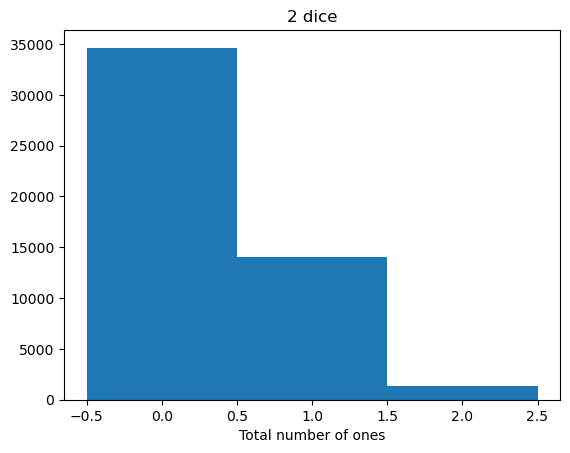

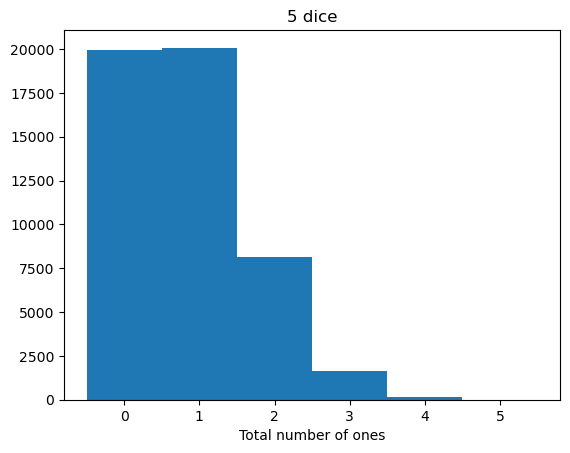

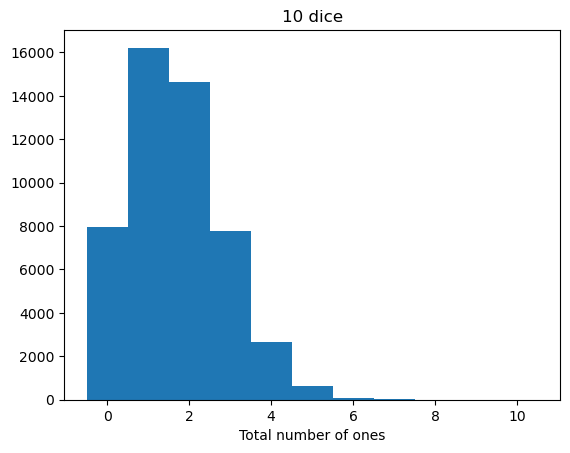

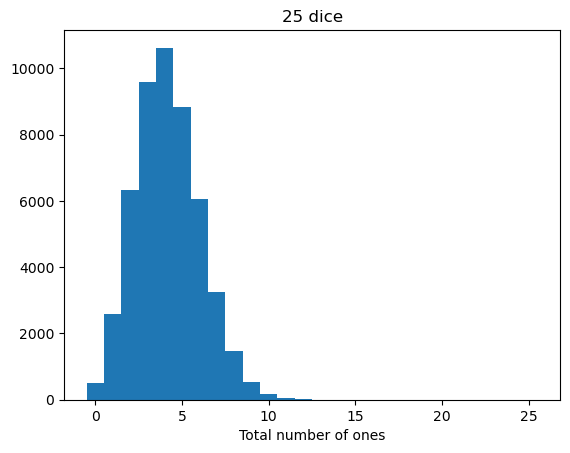

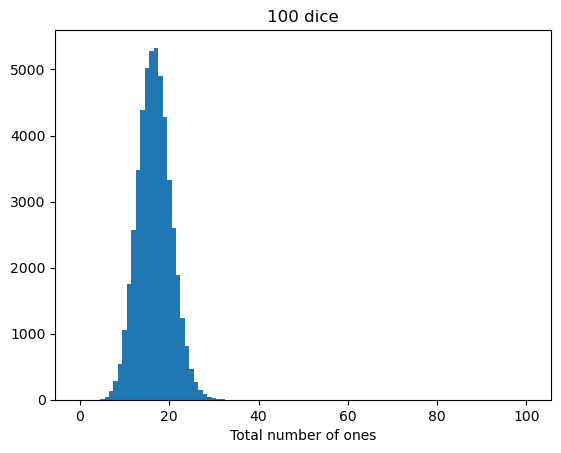

In [4]:
import dice
import importlib
importlib.reload(dice)

dice.rolldice(50_000)

## Checking the binomial distribution

__Add the following code (or your own equivalent code) to the rolldice procedure.__  You should be able to copy and paste to do this (be sure to save the file afterward).  Note that this code belongs _inside_ the for loop, as we want to test things for each possible number of dice.

Checking if $\mu = N \times p$ with `np.mean()` or `np.sum()`

    print(f'ndice: {ndice}')
    print(f'np.mean: {np.mean(np.sum(is_one[:,0:ndice],axis=1))}')
    print(f'np.sum: {np.sum(np.sum(is_one[:,0:ndice],axis=1))/nsims:.4f}')
    print(f'Expected mean: {ndice*prob:.4f} ')

Checking if the variance $\sigma^2 = N \times p \times (1-p)$ with `np.std` or `np.var`:

    print(f'np.std**2:{np.std( np.sum(is_one[:, 0:ndice],axis=1) )**2:.4f}')
    print(f'np.var: {np.var( np.sum(is_one[:, 0:ndice],axis=1) ) :.4f}')
    print(f'Expected variance: {ndice*prob*(1-prob):.4f}')
    
Also print a blank line to make results clearer:

    print('')

    
In the above,

    print(f'ndice: {ndice}')
is using the f-string formatting in Python. We can specify whether to format as integers or floating point numbers, how many decimal points to add, etc. by putting a colon inside the brackets; e.g. `{ndice:.4f}` would specify that ndice will be printed as a floating point number with 4 digits after the decimal point.  See https://cis.bentley.edu/sandbox/wp-content/uploads/Documentation-on-f-strings.pdf for documentation of the different possible formatting. 

__After making your changes, reload the module and run `rolldice` in the code box below.__

Note that to import the reload function you will need to do:

    from importlib import reload
    reload(dice)

ndice: 2
np.mean: 0.33104
np.sum: 0.3310
Expected mean: 0.3333 
np.std**2:0.2758
np.var: 0.2758
Expected variance: 0.2778

ndice: 5
np.mean: 0.82914
np.sum: 0.8291
Expected mean: 0.8333 
np.std**2:0.6965
np.var: 0.6965
Expected variance: 0.6944

ndice: 10
np.mean: 1.67408
np.sum: 1.6741
Expected mean: 1.6667 
np.std**2:1.3972
np.var: 1.3972
Expected variance: 1.3889

ndice: 25
np.mean: 4.17694
np.sum: 4.1769
Expected mean: 4.1667 
np.std**2:3.4802
np.var: 3.4802
Expected variance: 3.4722

ndice: 100
np.mean: 16.66542
np.sum: 16.6654
Expected mean: 16.6667 
np.std**2:13.8429
np.var: 13.8429
Expected variance: 13.8889



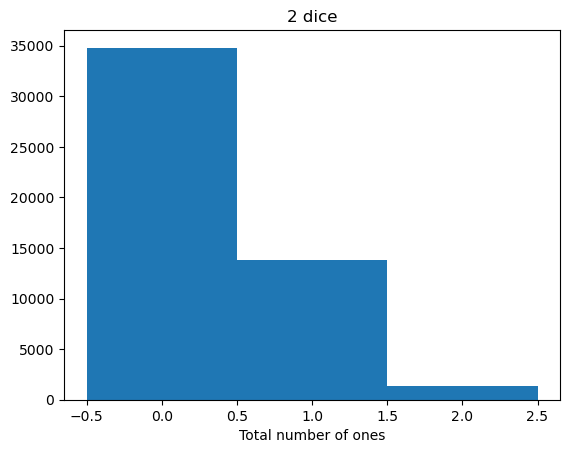

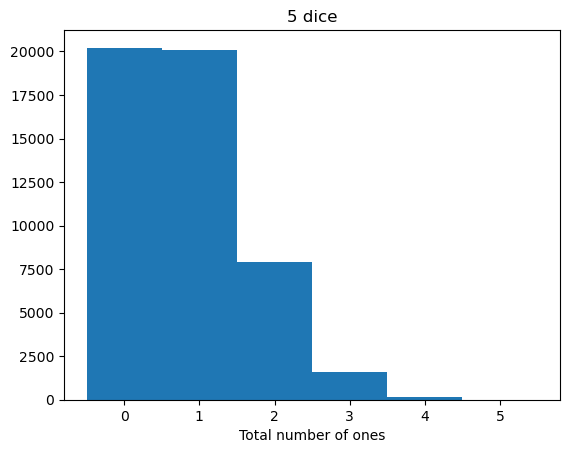

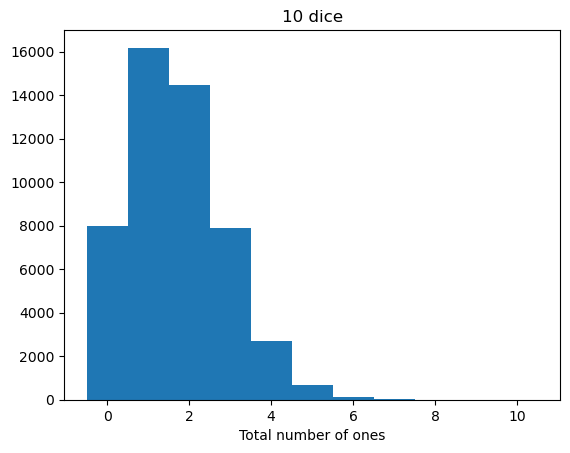

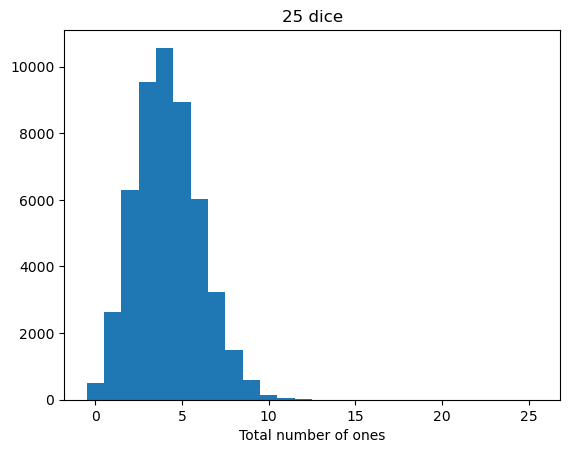

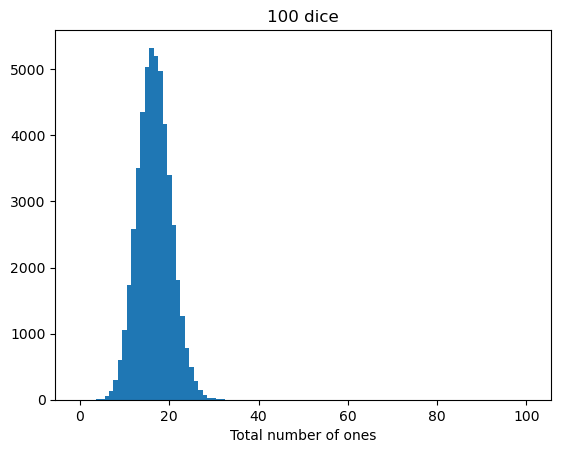

In [5]:
import dice
import importlib
importlib.reload(dice)

dice.rolldice(50_000)

## Plotting the binomial distribution

To calculate the binomial distribution, we need to use combinatorics.  Scipy provides functions to calculate either factorials (`scipy.misc.factorial()`) or the number of combinations (N choose M), `scipy.misc.comb()` . 

At the top of the module, let's add imports for them:

	from scipy.special import factorial,comb
Then, after: 

     plt.hist( np.sum(is_one[:,0:ndice],axis=1), 
       range=(-0.5,ndice+0.5),bins=(ndice + 1) )
Add:

    x=np.arange(ndice + 1)
and either:    

    plt.plot(x,nsims*factorial(ndice)/factorial(x)/   \
    factorial(ndice-x)*prob**x*(1-prob)**(ndice-x),'r-')
where the \ indicates that the python command continues onto the next line, or:

    plt.plot(x,nsims*comb(ndice,x)*prob**x*(1-prob)**(ndice-x),'ro')
    
__Then reload the module and plot again using the code box below.  Does what you get match expectations?__    


Text(0, 0.5, 'Number of occurences')

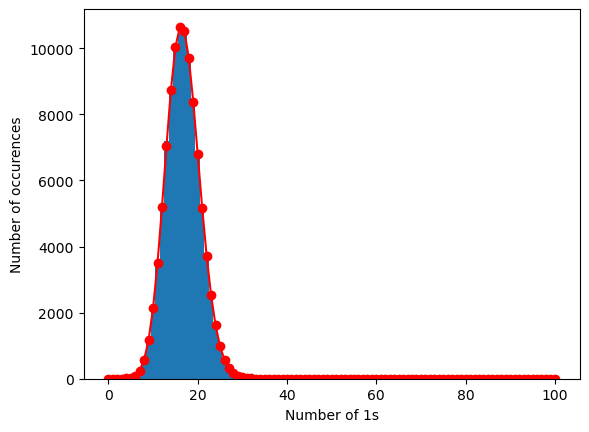

In [17]:
from scipy.special import factorial,comb

plt.hist( np.sum(is_one[:,0:ndice],axis=1), 
         range=(-0.5,ndice+0.5),
         bins=(ndice + 1)
        )

x=np.arange(ndice + 1)

plt.plot(
         x,
         nsims*factorial(ndice)/factorial(x)/factorial(ndice-x)*prob**x*(1-prob)**(ndice-x),
        'r-'
        )

plt.plot(
         x,
         nsims*comb(ndice,x)*prob**x*(1-prob)**(ndice-x),
         'ro'
        )

plt.xlabel('Number of 1s')
plt.ylabel('Number of occurences')


## Using the scipy-provided binomial function

`scipy.stats.binom.pmf(x,n,prob)` provides the probability of getting x occurrences out of n trials if the probability of an occurrence is `prob` (note that x can be an array!).  `pmf` here stands for "probability mass function".

Alternatively, you can set up an *object* that is a member of the binomial class and inherits all of its functions ("methods"), utilizing fixed values for `n` and `prob`, with e.g.

				a = stats.binom(n,prob)
and then get the PMF (the discrete equivalent of a PDF) via

 				a.pmf(x)

__In the below code box, import scipy.stats and read the documentation for binom__.

__Then, modify rolldice to add a curve to your plots showing the expected number of ones out of the simulation for each value of x, using `stats.binom` to calculate.__ Note that this will be `nsims` times the probability for one realization of the process (which is what the PMF gives you)...


In [21]:
import scipy.stats
?scipy.stats.binom

scipy.stats.binom.pmf(x,ndice,prob)


array([1.20746735e-08, 2.41493469e-07, 2.39078535e-06, 1.56197976e-05,
       7.57560184e-05, 2.90903111e-04, 9.21193183e-04, 2.47406169e-03,
       5.75219344e-03, 1.17600399e-02, 2.14032726e-02, 3.50235371e-02,
       5.19515800e-02, 7.03344467e-02, 8.74156695e-02, 1.00236634e-01,
       1.06501424e-01, 1.05248466e-01, 9.70624743e-02, 8.37802409e-02,
       6.78619952e-02, 5.17043773e-02, 3.71331437e-02, 2.51859583e-02,
       1.61609899e-02, 9.82588187e-03, 5.66877800e-03, 3.10733016e-03,
       1.62025073e-03, 8.04538293e-04, 3.80814792e-04, 1.71980874e-04,
       7.41667518e-05, 3.05656917e-05, 1.20464785e-05, 4.54324331e-06,
       1.64061564e-06, 5.67564330e-07, 1.88192383e-07, 5.98355269e-08,
       1.82498357e-08, 5.34141533e-09, 1.50068335e-09, 4.04835509e-10,
       1.04889200e-10, 2.61057565e-11, 6.24268090e-12, 1.43448838e-12,
       3.16782850e-13, 6.72355436e-14, 1.37160509e-14, 2.68942175e-15,
       5.06852560e-16, 9.18072561e-17, 1.59812631e-17, 2.67322946e-18,
      

Signature:       scipy.stats.binom(*args, **kwds)
Type:            binom_gen
String form:     <scipy.stats._discrete_distns.binom_gen object at 0x141f83a10>
File:            ~/miniforge3/envs/datascience/lib/python3.13/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A binomial discrete random variable.

As an instance of the `rv_discrete` class, `binom` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(n, p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, n, p, loc=0)
    Probability mass function.
logpmf(k, n, p, loc=0)
    Log of the probability mass function.
cdf(k, n, p, loc=0)
    Cumulative distribution function.
logcdf(k, n, p, loc=0)
    Log of the cumulative distribution function.
sf(k, n, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, n, p, loc=0)
    Log

ndice: 2
np.mean: 0.33148
np.sum: 0.3315
Expected mean: 0.3333 
np.std**2:0.2780
np.var: 0.2780
Expected variance: 0.2778

ndice: 5
np.mean: 0.8277
np.sum: 0.8277
Expected mean: 0.8333 
np.std**2:0.6894
np.var: 0.6894
Expected variance: 0.6944

ndice: 10
np.mean: 1.65586
np.sum: 1.6559
Expected mean: 1.6667 
np.std**2:1.3796
np.var: 1.3796
Expected variance: 1.3889

ndice: 25
np.mean: 4.16286
np.sum: 4.1629
Expected mean: 4.1667 
np.std**2:3.4667
np.var: 3.4667
Expected variance: 3.4722

ndice: 100
np.mean: 16.6715
np.sum: 16.6715
Expected mean: 16.6667 
np.std**2:13.9821
np.var: 13.9821
Expected variance: 13.8889



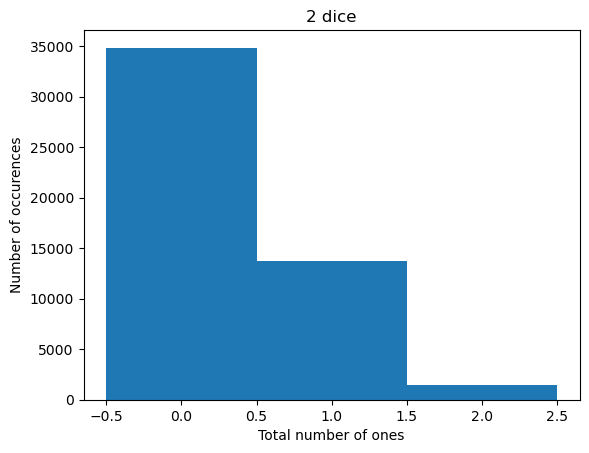

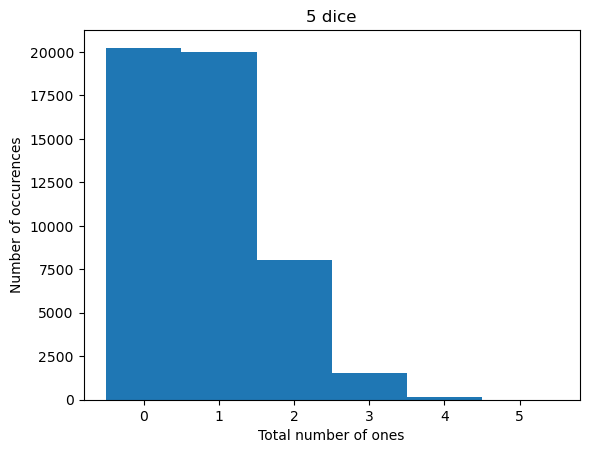

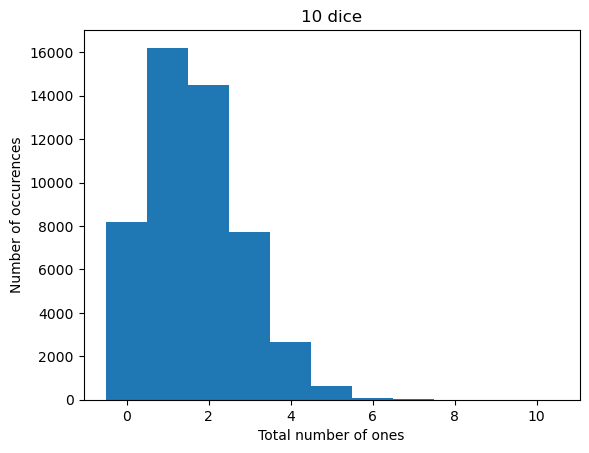

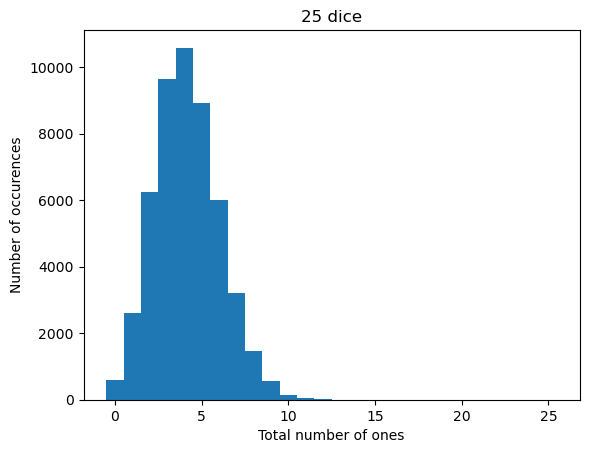

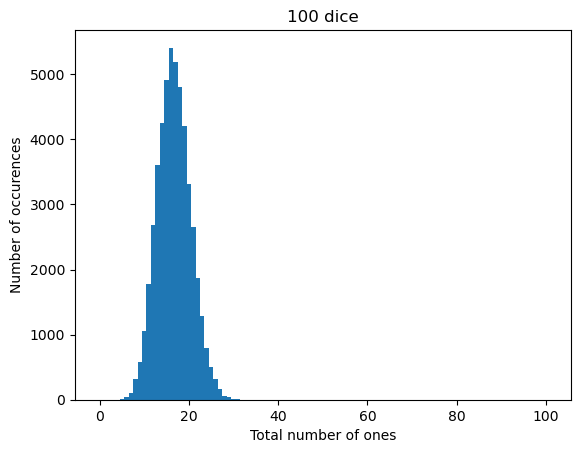

In [2]:
import dice
import importlib
importlib.reload(dice)

dice.rolldice(50_000)

# If you have extra time...

Some things you can do if you get ahead of the class:

- Try changing string formats to improve the outputs; try to change the font size in your figures to make them look better; etc.  Share plotting optimizations you tend to use with your neighbors!

- modify `rolldice` so that it can take the number of sides a die has as a keyword input (e.g. 4, 6, 8, 10, 12, 20 and even 100-sided dice exist).  Use 6 sides as a default (see https://www.ibiblio.org/g2swap/byteofpython/read/keyword-arguments.html for how to do this).  As the number of sides increases, the probability of rolling a one goes down.  
 - **Assess: Does the distribution look more or less Gaussian as the probability changes?**
 - Compare the distribution of results for rolling 10 20-sided dice to the distribution for rolling 50 100-sided dice, plotting them on the same axes.  You could also try 25 50-sided dice for comparison.  Plot them in the same figure, using the 'step' histogram type or the alpha keyword to be able to see histograms on top of each other.  What might be going on here?
        